Requirements:

- installation anaconda 
- pip install seaborn
- pip install xgboost
- pip install keras
- pip install tensorflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

Chargement du jeu de données

In [2]:
data = pd.read_excel('data.xlsx')

Affichage des 10 premiers lignes du jeu de données

In [3]:
data.head(10)

ID  Gender  Nationality  Major  Level  IE1  SMSK3  RAS1  RAS2  SMSK1  ...  \
0   1       0            1      0      2    4      3     4     4      2  ...   
1   2       0            0      0      2    4      4     4     4      3  ...   
2   3       0            1      0      1    3      2     3     4      3  ...   
3   4       1            1      1      3    4      4     4     4      4  ...   
4   5       0            0      0      2    4      3     3     4      3  ...   
5   6       1            0      1      2    3      3     3     4      3  ...   
6   7       0            1      0      2    2      2     3     3      3  ...   
7   8       0            1      0      1    4      4     4     4      4  ...   
8   9       0            1      1      3    4      3     4     4      4  ...   
9  10       0            0      1      2    4      4     4     4      4  ...   

   IM3  IM4  IM5  IM6   W1   W2   W3  Employed  Score  Class  
0    4    4    4    4  4.0  4.0  4.0       1.0   3.20      1  
1    4    3    4    4  3.0  4.0  3.0       0.0   3.82      1  
2    3    4    4    3  4.0  4.0  2.0       1.0   3.75      1  
3    4    4    4    4  3.0  4.0  4.0       1.0   3.70      1  
4    4    3    3    3  4.0  4.0  2.0       1.0   3.82      0  
5    3    3    4    3  3.0  4.0  2.0       1.0   3.68      0  
6    4    3    3    3  4.0  4.0  4.0       1.0   3.83      0  
7    4    4    4    4  4.0  4.0  4.0       1.0   3.27      1  
8    4    3    4    3  4.0  4.0  4.0       1.0   3.00      0  
9    4    4    4    4  4.0  3.0  3.0       1.0   3.85      1  

[10 rows x 39 columns]

# Exploratory Data Analysis

Objectif :
- Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)
- Développer une premiere stratégie de modélisation

**Analyse de la forme des données**


*   Variable target : Class
*   Nombre des lignes et colonnes :260 ,39 
*   Types de variables : qualitatives : 4, quantitatives : 35
*   Analyse des valeurs manquantes : pas beaucoup (Employed:0.007692% , W2:0053846% , W1:0.073077% , W3:0.192308% )













In [4]:
df = data.copy()

In [5]:
df.shape

(260, 39)

In [6]:
df.dtypes.value_counts()

int64      34
float64     5
dtype: int64

**Visualisation les données manquantes**


<AxesSubplot:>

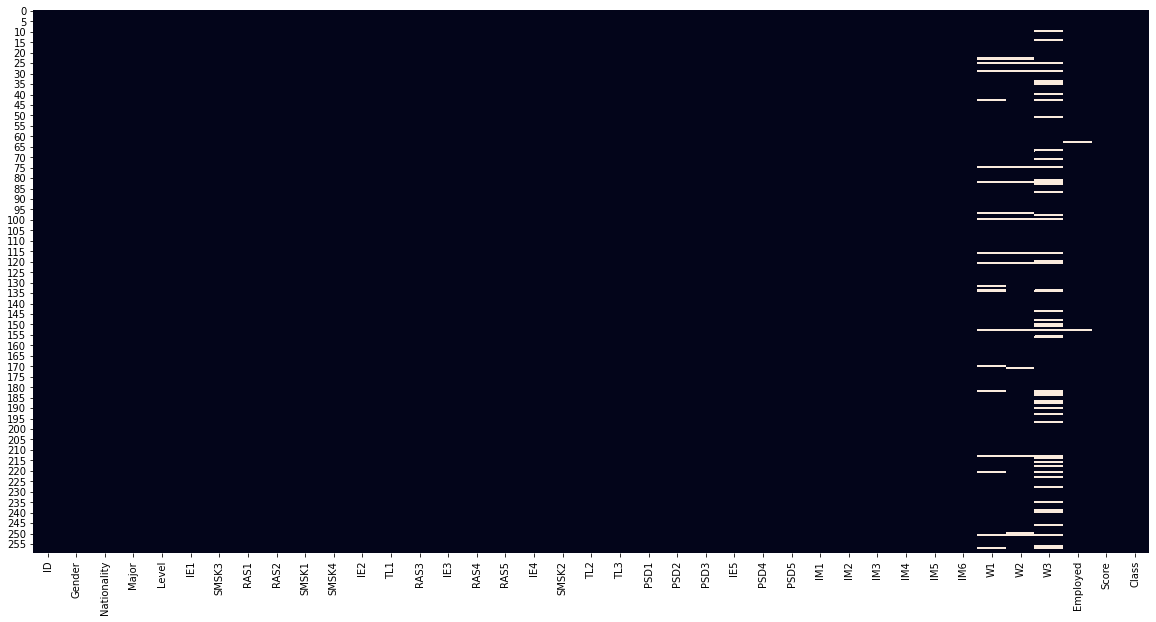

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

**Calcul en pourcentage la quantité des données manquantes de chaque 
variable** 

In [8]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

ID             0.000000
Score          0.000000
TL3            0.000000
PSD1           0.000000
PSD2           0.000000
PSD3           0.000000
IE5            0.000000
SMSK2          0.000000
PSD4           0.000000
IM1            0.000000
IM2            0.000000
IM3            0.000000
IM4            0.000000
IM5            0.000000
IM6            0.000000
PSD5           0.000000
IE4            0.000000
TL2            0.000000
RAS4           0.000000
Gender         0.000000
Nationality    0.000000
Major          0.000000
Level          0.000000
RAS5           0.000000
SMSK3          0.000000
RAS1           0.000000
IE1            0.000000
SMSK1          0.000000
SMSK4          0.000000
IE2            0.000000
TL1            0.000000
RAS3           0.000000
IE3            0.000000
RAS2           0.000000
Class          0.000000
Employed       0.007692
W2             0.053846
W1             0.073077
W3             0.192308
dtype: float64

**Analyse de Fond**

**Suppression column ID**

In [9]:
df = df.drop('ID', axis=1)

Affichage des 10 premiers lignes de notre jeux de données


In [10]:
df.head(10)

Gender  Nationality  Major  Level  IE1  SMSK3  RAS1  RAS2  SMSK1  SMSK4  \
0       0            1      0      2    4      3     4     4      2      3   
1       0            0      0      2    4      4     4     4      3      3   
2       0            1      0      1    3      2     3     4      3      3   
3       1            1      1      3    4      4     4     4      4      3   
4       0            0      0      2    4      3     3     4      3      3   
5       1            0      1      2    3      3     3     4      3      3   
6       0            1      0      2    2      2     3     3      3      3   
7       0            1      0      1    4      4     4     4      4      4   
8       0            1      1      3    4      3     4     4      4      4   
9       0            0      1      2    4      4     4     4      4      4   

   ...  IM3  IM4  IM5  IM6   W1   W2   W3  Employed  Score  Class  
0  ...    4    4    4    4  4.0  4.0  4.0       1.0   3.20      1  
1  ...    4    3    4    4  3.0  4.0  3.0       0.0   3.82      1  
2  ...    3    4    4    3  4.0  4.0  2.0       1.0   3.75      1  
3  ...    4    4    4    4  3.0  4.0  4.0       1.0   3.70      1  
4  ...    4    3    3    3  4.0  4.0  2.0       1.0   3.82      0  
5  ...    3    3    4    3  3.0  4.0  2.0       1.0   3.68      0  
6  ...    4    3    3    3  4.0  4.0  4.0       1.0   3.83      0  
7  ...    4    4    4    4  4.0  4.0  4.0       1.0   3.27      1  
8  ...    4    3    4    3  4.0  4.0  4.0       1.0   3.00      0  
9  ...    4    4    4    4  4.0  3.0  3.0       1.0   3.85      1  

[10 rows x 38 columns]

**Examen de la colonne target**


*   51% pour la class 0
*   49% pour la class 1



In [11]:
df['Class'].value_counts(normalize=True)

0    0.511538
1    0.488462
Name: Class, dtype: float64

<AxesSubplot:ylabel='Class'>

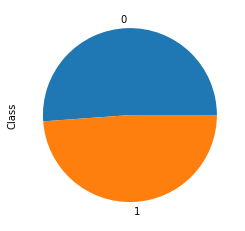

In [12]:
df['Class'].value_counts(normalize=True).plot.pie()

**histogrames des variables continues**

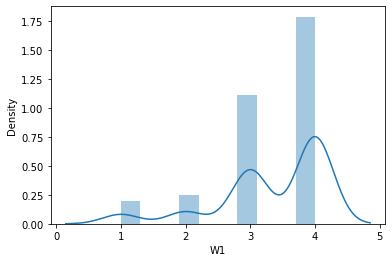

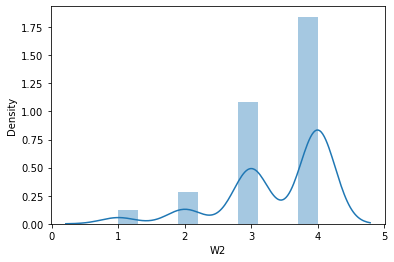

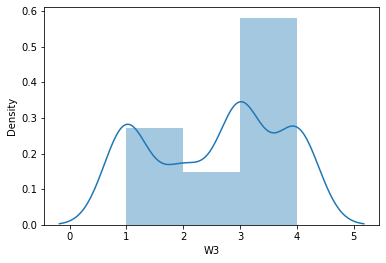

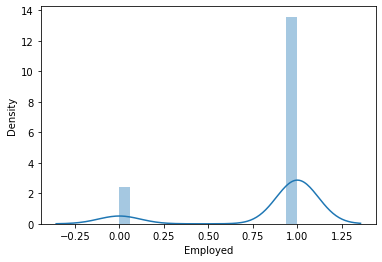

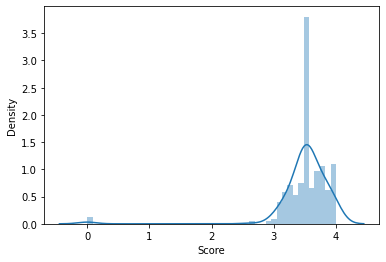

In [13]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

 **Variables Qualitatives**

In [14]:
Var_Qual=['Gender','Nationality','Major','Class']
for col in Var_Qual:
    print(f'{col :-<50} {df[col].unique()}')

Gender-------------------------------------------- [0 1]
Nationality--------------------------------------- [1 0]
Major--------------------------------------------- [0 1]
Class--------------------------------------------- [1 0]


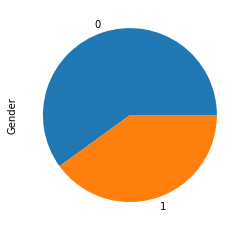

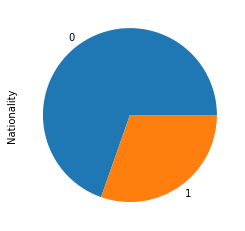

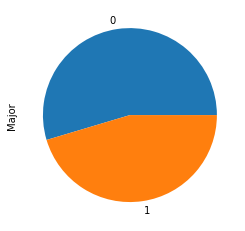

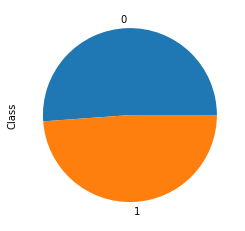

In [15]:
for col in Var_Qual:
    plt.figure()
    df[col].value_counts().plot.pie()

**Relation Target / Variables**

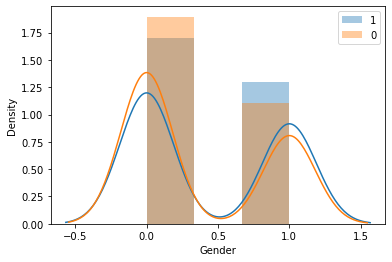

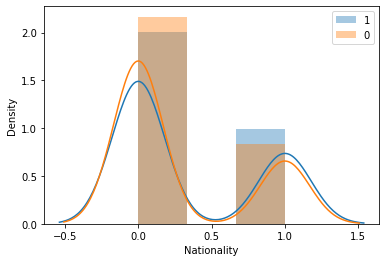

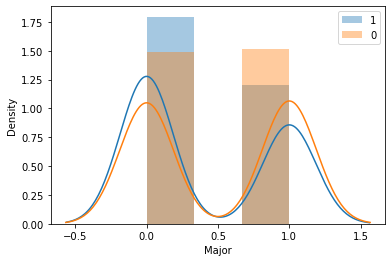

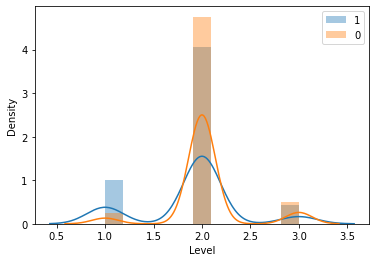

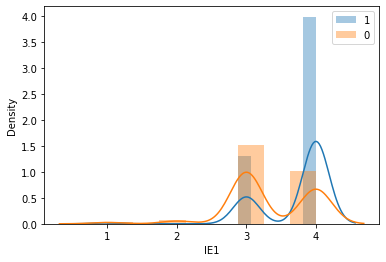

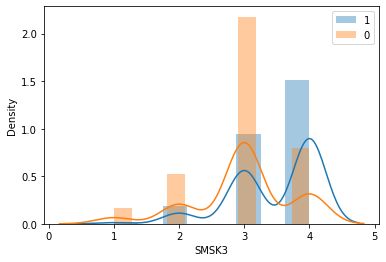

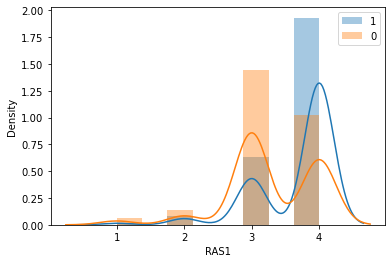

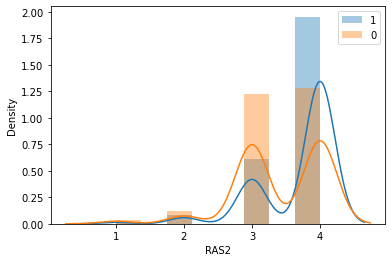

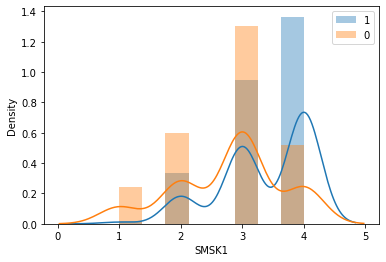

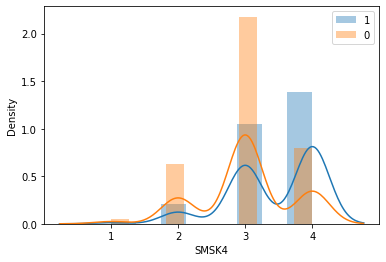

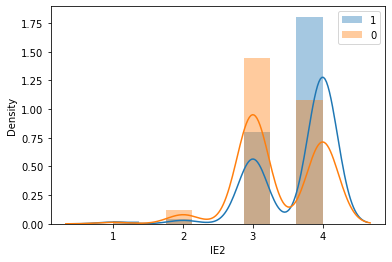

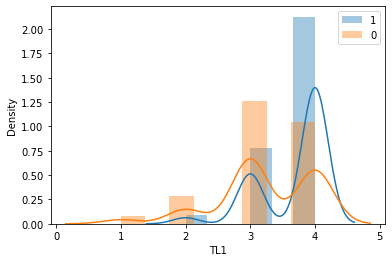

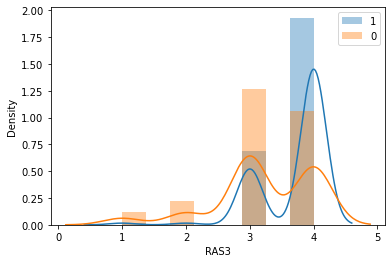

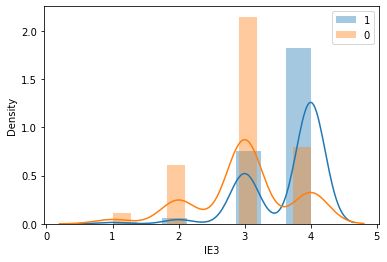

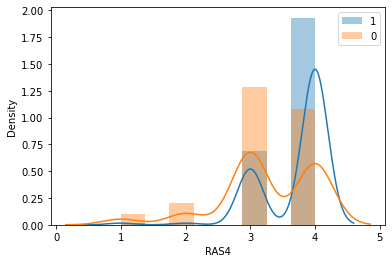

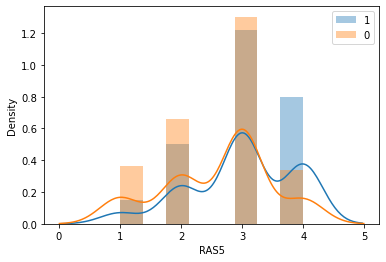

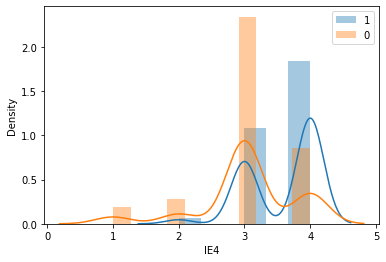

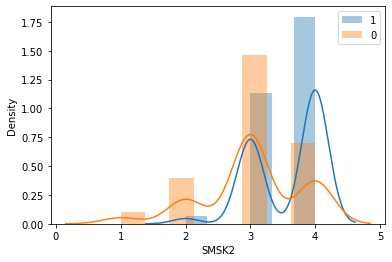

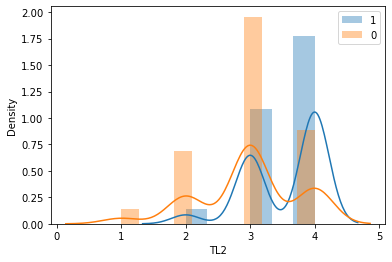

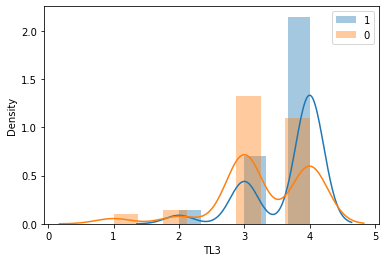

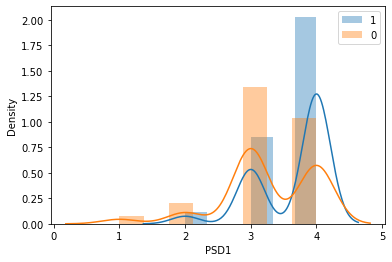

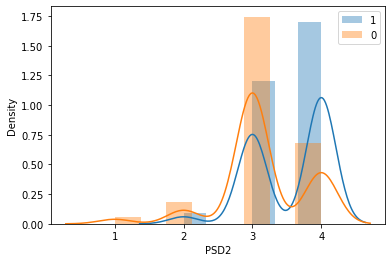

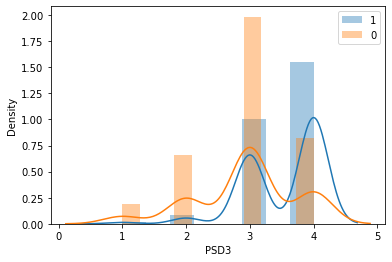

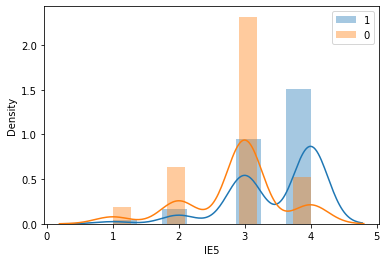

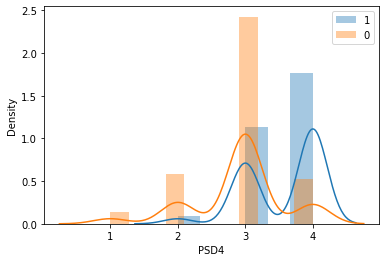

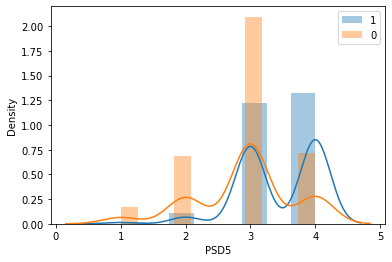

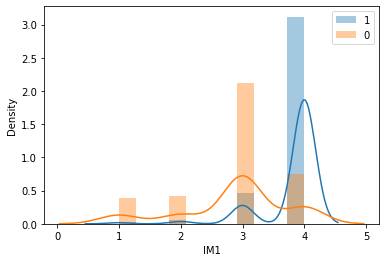

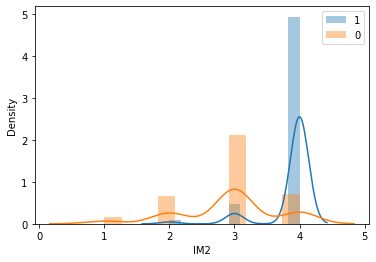

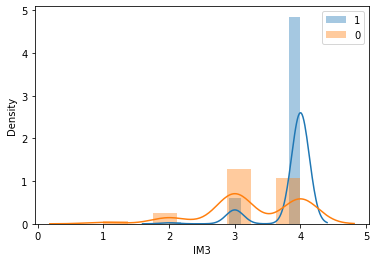

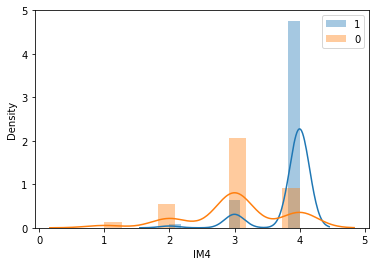

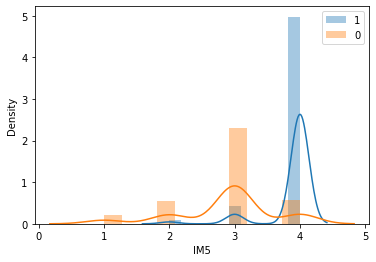

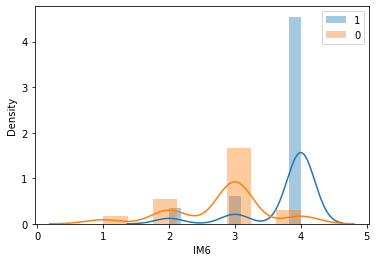

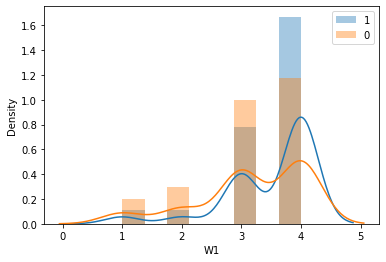

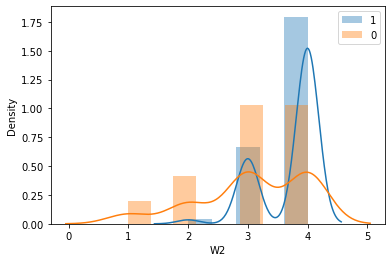

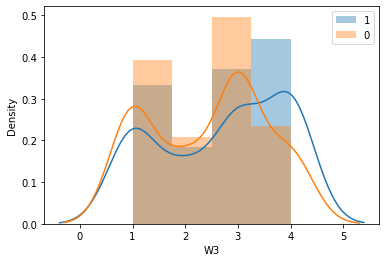

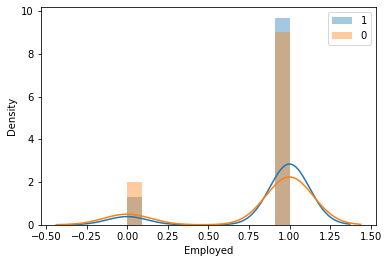

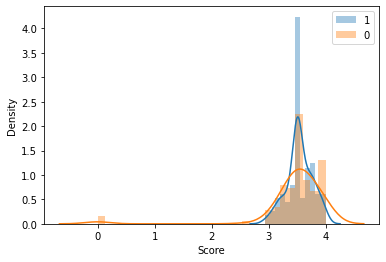

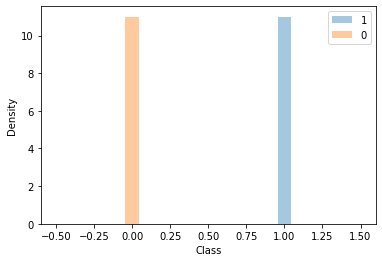

In [16]:
positive_df = df[df['Class'] == 1]
negative_df = df[df['Class'] == 0]
for col in df.columns:
    plt.figure()
    sns.distplot(positive_df[col], label='1')
    sns.distplot(negative_df[col], label='0')
    plt.legend()

**Relation Variables / Variables**

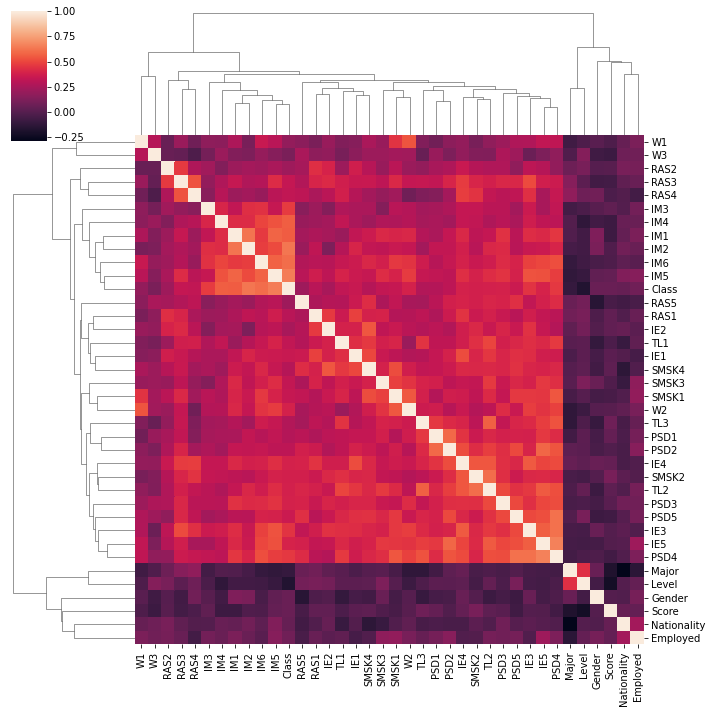

In [17]:
sns.clustermap(df.corr())

# Prétraitements des données (Pre-processing)
transformer les données pour les mettre dans un format propice au machine learning

**Eliminer les données manquantes** 

In [18]:

df = df.dropna(axis=0)


**Affichage liste des lignes dupliquées**


In [19]:
duplicated_rows=df[df.duplicated()]
duplicated_rows

Gender  Nationality  Major  Level  IE1  SMSK3  RAS1  RAS2  SMSK1  SMSK4  \
217       0            0      1      3    4      4     4     4      4      4   
219       0            0      1      3    4      4     4     4      4      4   
220       0            0      1      3    4      4     4     4      2      4   
236       1            1      1      2    3      3     3     3      2      2   
237       1            0      1      2    3      3     4     4      3      3   
241       1            0      1      2    4      4     4     4      4      4   
247       1            1      0      2    4      4     4     4      3      3   
248       1            1      0      2    3      3     4     4      2      3   
249       0            1      0      2    3      3     3     4      4      2   

     ...  IM3  IM4  IM5  IM6   W1   W2   W3  Employed  Score  Class  
217  ...    4    4    4    4  4.0  3.0  3.0       1.0   3.51      1  
219  ...    4    4    4    4  4.0  4.0  4.0       1.0   3.51      1  
220  ...    4    4    4    2  3.0  3.0  4.0       1.0   3.51      1  
236  ...    2    4    4    1  4.0  3.0  3.0       1.0   3.51      0  
237  ...    4    4    4    4  3.0  3.0  2.0       0.0   3.51      1  
241  ...    4    4    4    4  4.0  4.0  2.0       0.0   3.51      1  
247  ...    4    3    4    4  4.0  4.0  1.0       1.0   3.51      1  
248  ...    3    2    3    2  2.0  1.0  1.0       1.0   3.51      0  
249  ...    4    4    4    4  4.0  4.0  1.0       1.0   3.51      1  

[9 rows x 38 columns]

**Supression les lignes dupliquées**

In [20]:
df=df.drop_duplicates()
df.head()

Gender  Nationality  Major  Level  IE1  SMSK3  RAS1  RAS2  SMSK1  SMSK4  \
0       0            1      0      2    4      3     4     4      2      3   
1       0            0      0      2    4      4     4     4      3      3   
2       0            1      0      1    3      2     3     4      3      3   
3       1            1      1      3    4      4     4     4      4      3   
4       0            0      0      2    4      3     3     4      3      3   

   ...  IM3  IM4  IM5  IM6   W1   W2   W3  Employed  Score  Class  
0  ...    4    4    4    4  4.0  4.0  4.0       1.0   3.20      1  
1  ...    4    3    4    4  3.0  4.0  3.0       0.0   3.82      1  
2  ...    3    4    4    3  4.0  4.0  2.0       1.0   3.75      1  
3  ...    4    4    4    4  3.0  4.0  4.0       1.0   3.70      1  
4  ...    4    3    3    3  4.0  4.0  2.0       1.0   3.82      0  

[5 rows x 38 columns]

In [21]:
df.shape

(194, 38)

**Affichage la liste des columns**

In [22]:
df.columns

Index(['Gender', 'Nationality', 'Major', 'Level', 'IE1', 'SMSK3', 'RAS1',
       'RAS2', 'SMSK1', 'SMSK4', 'IE2', 'TL1', 'RAS3', 'IE3', 'RAS4', 'RAS5',
       'IE4', 'SMSK2', 'TL2', 'TL3', 'PSD1', 'PSD2', 'PSD3', 'IE5', 'PSD4',
       'PSD5', 'IM1', 'IM2', 'IM3', 'IM4', 'IM5', 'IM6', 'W1', 'W2', 'W3',
       'Employed', 'Score', 'Class'],
      dtype='object')

**Test de la duplication du colonne**


*   pas du colonne dupliquée dans notre jeux de données




In [23]:
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

In [24]:
# Get list of duplicate columns
duplicateColumnNames = getDuplicateColumns(df)
print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)

Duplicate Columns are as follows


**Échantillonnage**

Répartition notre jeu de données en 70% pour le apprentissage et 30% pour le validation

In [25]:
from sklearn.model_selection import train_test_split

X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=0,shuffle=True)


Notre jeux de données pour l'apprentissage contient :


*   68 observations associées à class 1

*   67 observations associées à class 0




In [26]:
Y_train.value_counts()

1    68
0    67
Name: Class, dtype: int64

Notre jeux de données pour le validation  contient :


*   29 observations associées à class 1
*   30 observations associées à class 0




In [27]:
Y_test.value_counts()

0    30
1    29
Name: Class, dtype: int64

# Modelisation
**Objectif :** développer un modéle de machine learning qui répond à l'objectif final 


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,BaggingClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import learning_curve
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report

Machine learning pipeline

Les classifiers  utilisées sont :


*   RandomForestClassifier
*   LogisticRegression
*   AdaBoostClassifier
*   DecisionTreeClassifier
*   SVC
*   KNeighbors
*   XGBClassifier
*   VotingClassifier
*   GaussianNB
*   BaggingClassifier











Génération des nouveaux descripteurs à partir nos données et sélection les 13 importantes descripteurs

In [29]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=13))

Création des modèles machine learning pour une classification binaire


In [30]:
DecisionTreeClassifier = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=0))
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())
BaggingClassifier=make_pipeline(preprocessor,BaggingClassifier(random_state=0))
gnb = make_pipeline(preprocessor,GaussianNB())
log_reg = make_pipeline(preprocessor,StandardScaler(),LogisticRegression())
voting_clf = VotingClassifier( estimators=[("lr", log_reg),('BaggingClassifier',BaggingClassifier),('rf',RandomForest)], voting="hard" )
xgb = make_pipeline(preprocessor,XGBClassifier(max_depth=2, learning_rate=0.01, n_estimators=1000, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005))


In [31]:
dict_of_models = {'RandomForest': RandomForest,
                  'DecisionTreeClassifier':DecisionTreeClassifier,
                  'AdaBoost' : AdaBoost,
                  'BaggingClassifier':BaggingClassifier,
                  'SVM': SVM,
                  'KNN': KNN,
                  'naive_bayes': gnb,
                  'LogisticRegression':log_reg,
                  'VotingClassifier':voting_clf,
                  'XGboost':xgb
                 }

**Procédure d'évaluation**


**Methode 1:Models d'apprentissage avec validation croisée K=4** 


1.   Calcule F1_score de chaque classifier 
2.   visualisation les courbes d'évaluation a différentes classifier
3.   visualisation les prédictions par le matrice de confusion
4.   visualisation le rapport de classification qui donne des mesures comme précision et le rappel , F1_score pour évaluer notre model 
5.   Tableau comparatif de performance entre différents classifieurs 



In [32]:
def evaluation_with_cross_validation(model,name):
    
    
    
    
  
    
    

    N, train_score, val_score = learning_curve(model, X ,Y,cv=4,
                                               scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 15))
    
    train1_score=train_score.mean(axis=1)
    val1_score=val_score.mean(axis=1)
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.title('Evaluation:'+name)
    plt.legend()
    plt.savefig('evaluation_'+name+'.png')
    return train1_score,val1_score

[15:02:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[15:02:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

model  F1_score_train  F1_score_val
0            RandomForest        1.000000      0.968302
1  DecisionTreeClassifier        1.000000      0.973843
2                AdaBoost        1.000000      0.968528
3       BaggingClassifier        0.998252      0.973621
4                     SVM        0.975545      0.947473
5                     KNN        0.957817      0.942797
6             naive_bayes        0.922380      0.908601
7      LogisticRegression        0.963696      0.937903
8        VotingClassifier        1.000000      0.973621
9                 XGboost        0.994827      0.973843

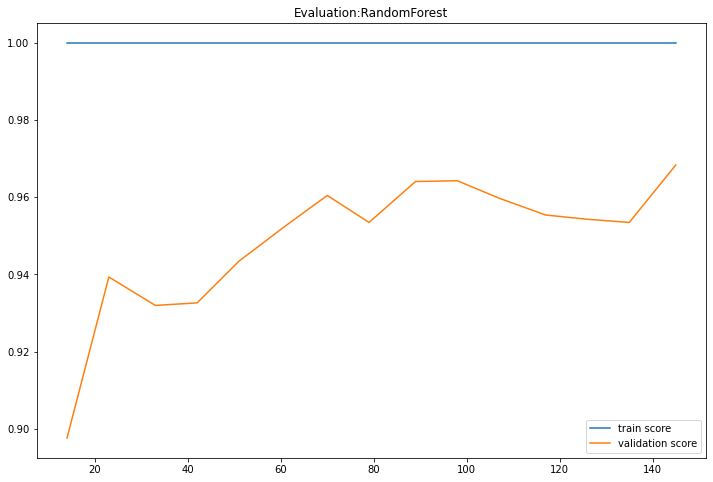

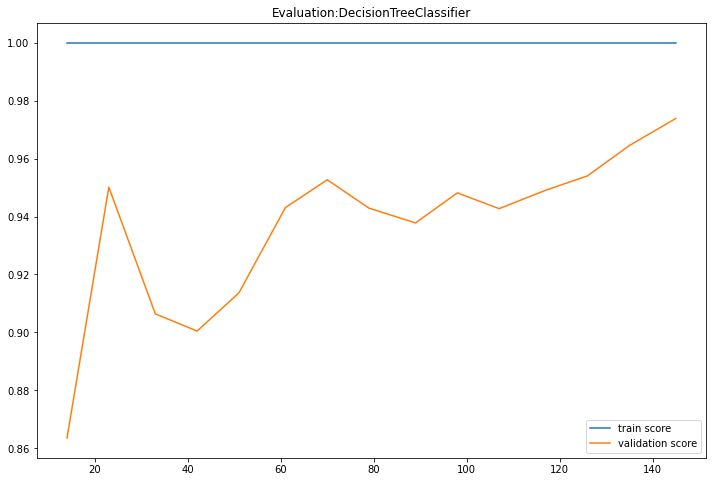

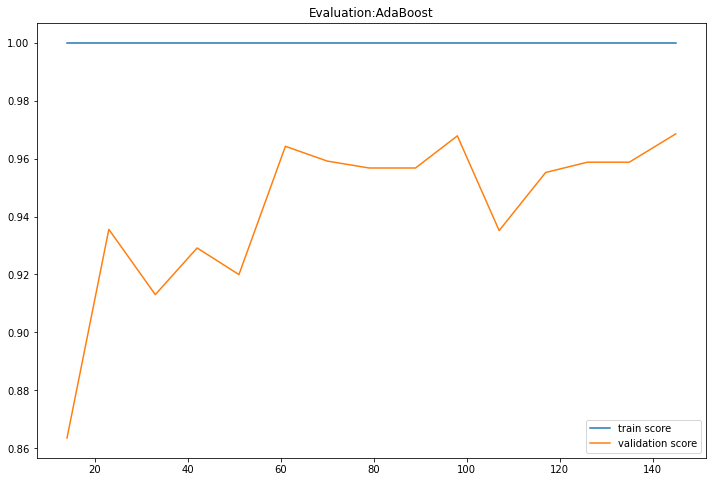

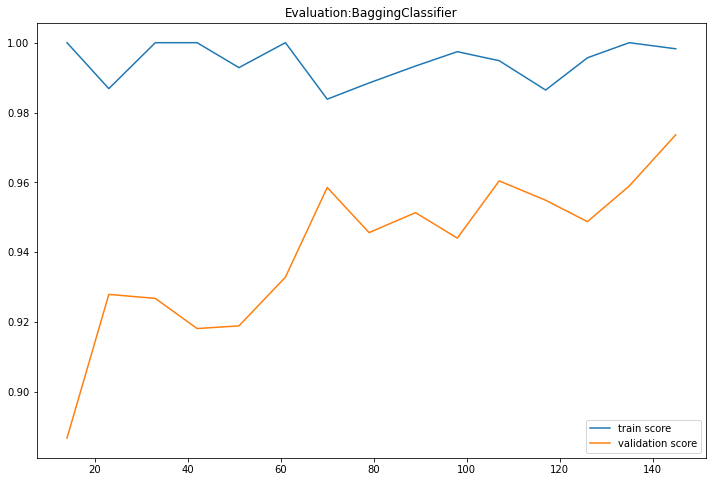

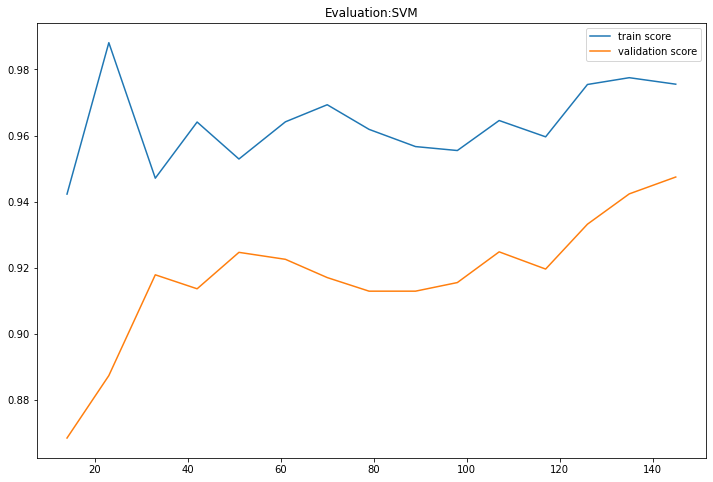

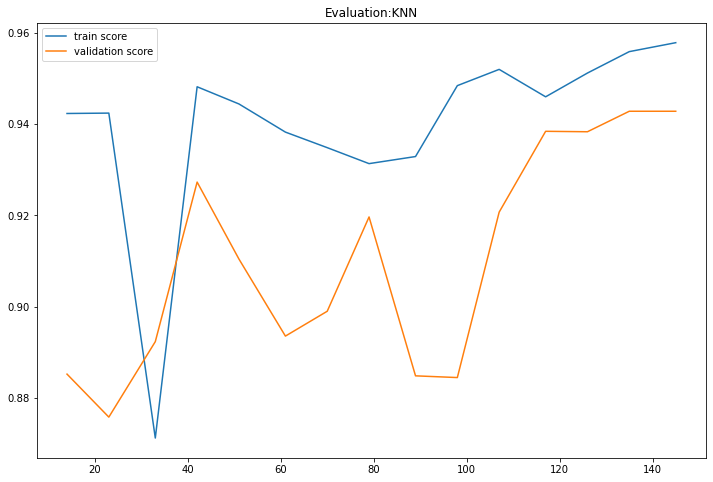

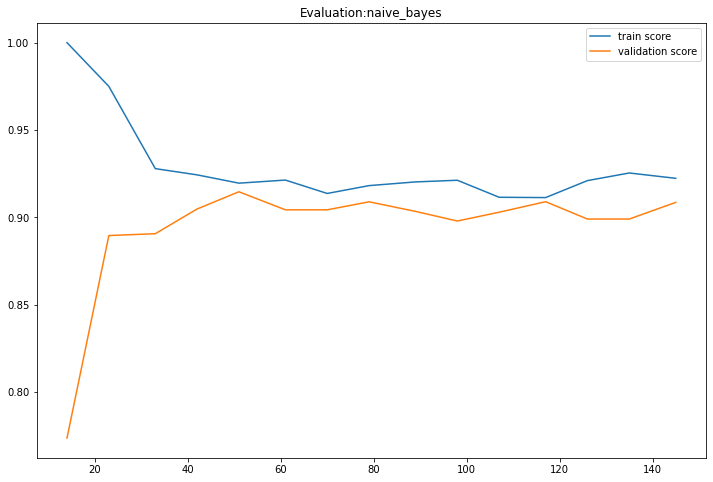

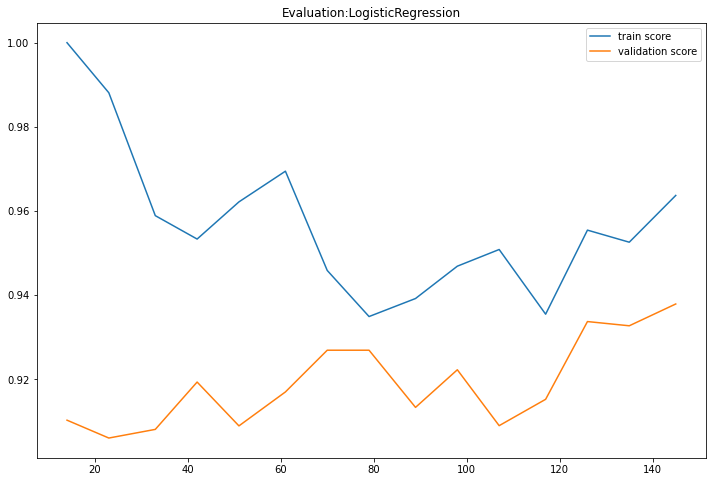

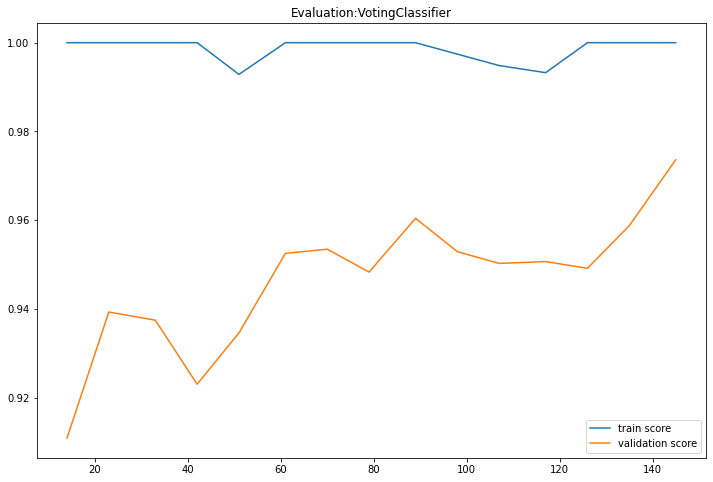

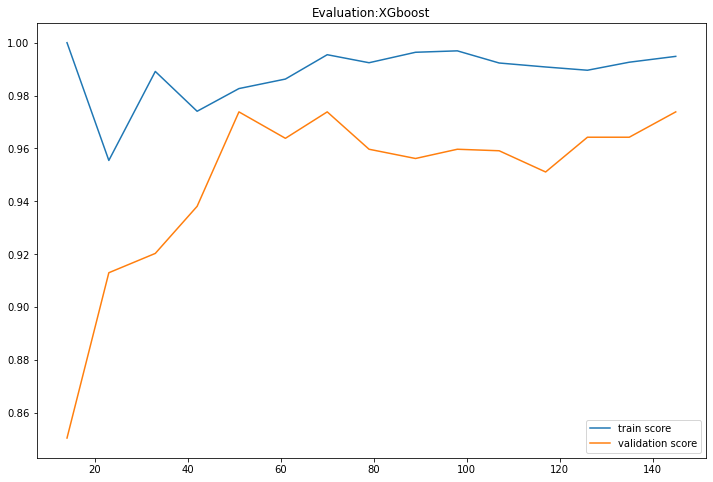

In [33]:
train_scores=[]
val_scores=[]
names=[]

for name, model in dict_of_models.items():
  
    train_score,val_score=evaluation_with_cross_validation(model,name)
    
    train_scores.append(train_score[-1])
    val_scores.append(val_score[-1])
    names.append(name)

evaluate = pd.DataFrame({"model": names, "F1_score_train": train_scores,"F1_score_val": val_scores})
evaluate 
  
    
   

    


 **Method 2: Models d'apprentissage avec échantillonnage des données 30% pour le validation et 70% pour l'apprentissage**


1.   Calcule F1_score de chaque classifier 
2.   visualisation les prédictions par le matrice de confusion
3.   visualisation le rapport de classification qui donne des mesures comme précision et le rappel , F1_score pour évaluer notre model 
4.   Tableau comparatif de performance entre différents classifieurs **texte en gras**

In [34]:
def evaluation_with_train_test_split_train(model,name):
    
    model.fit(X_train, Y_train)
    ypred = model.predict(X_train)
    score=f1_score(Y_train,ypred)
    print('Training : confusion matrix')
    print(confusion_matrix(Y_train, ypred))
    print('Training : report classification ')
    print(classification_report(Y_train, ypred))
    return score


In [35]:
def evaluation_with_train_test_split_test(model,name):
    
    model.fit(X_train, Y_train)
    ypred = model.predict(X_test)
    score=f1_score(Y_test,ypred)
    print('validation : confusion matrix')
    print(confusion_matrix(Y_test, ypred))
    print('validation : report classification ')
    print(classification_report(Y_test, ypred))
    return score
   

In [36]:

train_scores=[]
val_scores=[]

names=[]

for name, model in dict_of_models.items():
    print(name)
    train_score=evaluation_with_train_test_split_train(model,name)
    val_score=evaluation_with_train_test_split_test(model,name)
    train_scores.append(train_score)
    val_scores.append(val_score)
    names.append(name)

evaluate = pd.DataFrame({"model": names, "F1_score_train": train_scores, "F1_score_val": val_scores})
evaluate 

RandomForest
Training : confusion matrix
[[67  0]
 [ 0 68]]
Training : report classification 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        68

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135

validation : confusion matrix
[[29  1]
 [ 0 29]]
validation : report classification 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.97      1.00      0.98        29

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59

DecisionTreeClassifier
Training : confusion matrix
[[67  0]
 [ 0 68]]
Training : report classification 
              precision    recall  f1-score   support

        

model  F1_score_train  F1_score_val
0            RandomForest        1.000000      0.983051
1  DecisionTreeClassifier        1.000000      0.965517
2                AdaBoost        1.000000      1.000000
3       BaggingClassifier        1.000000      0.983051
4                     SVM        0.962406      0.947368
5                     KNN        0.962406      0.947368
6             naive_bayes        0.947368      0.912281
7      LogisticRegression        0.962406      0.947368
8        VotingClassifier        1.000000      0.983051
9                 XGboost        1.000000      0.983051

**Interprétation sur les  Résultats:** 


1.   Pas de surapprentissage 


2.   Ils sont trés proches  


3.  D'aprés le Méthode 1 et 2 :AdaBoost c'est  plus meilleur classifieur avec un score F1 égale 100%



**Création un simple réseau du neurone approfondi pour la classifcation binaire (0|1)**

**NB:** dans cette approche (Apprentissage profond) a du score plus petite que les approches classiques car cette approche necessite des données volumineuses pour mieux d'avoir score


In [37]:
from keras import Sequential
from keras.layers import Dense

In [38]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(6, activation='relu', kernel_initializer='random_normal', input_dim=X_train.shape[1]))
#Second  Hidden Layer
classifier.add(Dense(3, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [39]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [40]:
#Fitting the data to the training dataset
history=classifier.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=500,verbose=1,shuffle=True)

Epoch 1/500
5/5 [==============================] - 0s 35ms/step - loss: 0.6932 - accuracy: 0.4667 - val_loss: 0.6932 - val_accuracy: 0.4576
Epoch 2/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5185 - val_loss: 0.6932 - val_accuracy: 0.4576
Epoch 3/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4815 - val_loss: 0.6932 - val_accuracy: 0.4576
Epoch 4/500
5/5 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.4741 - val_loss: 0.6931 - val_accuracy: 0.5085
Epoch 5/500
5/5 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.4963 - val_loss: 0.6931 - val_accuracy: 0.5085
Epoch 6/500
5/5 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.4963 - val_loss: 0.6931 - val_accuracy: 0.5085
Epoch 7/500
5/5 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.4963 - val_loss: 0.6930 - val_accuracy: 0.5085
Epoch 8/500
5/5 [=========

5/5 [==============================] - 0s 4ms/step - loss: 0.5945 - accuracy: 0.8815 - val_loss: 0.5914 - val_accuracy: 0.7966
Epoch 60/500
5/5 [==============================] - 0s 5ms/step - loss: 0.5788 - accuracy: 0.7111 - val_loss: 0.5876 - val_accuracy: 0.7288
Epoch 61/500
5/5 [==============================] - 0s 4ms/step - loss: 0.5743 - accuracy: 0.7926 - val_loss: 0.5851 - val_accuracy: 0.8475
Epoch 62/500
5/5 [==============================] - 0s 4ms/step - loss: 0.5670 - accuracy: 0.8370 - val_loss: 0.5772 - val_accuracy: 0.7966
Epoch 63/500
5/5 [==============================] - 0s 4ms/step - loss: 0.5617 - accuracy: 0.8222 - val_loss: 0.5718 - val_accuracy: 0.7966
Epoch 64/500
5/5 [==============================] - 0s 4ms/step - loss: 0.5579 - accuracy: 0.7630 - val_loss: 0.5662 - val_accuracy: 0.7966
Epoch 65/500
5/5 [==============================] - 0s 4ms/step - loss: 0.5541 - accuracy: 0.8667 - val_loss: 0.5685 - val_accuracy: 0.8475
Epoch 66/500
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.2804 - accuracy: 0.9111 - val_loss: 0.3150 - val_accuracy: 0.8644
Epoch 118/500
5/5 [==============================] - 0s 5ms/step - loss: 0.2757 - accuracy: 0.9111 - val_loss: 0.3129 - val_accuracy: 0.8814
Epoch 119/500
5/5 [==============================] - 0s 5ms/step - loss: 0.2851 - accuracy: 0.8963 - val_loss: 0.3111 - val_accuracy: 0.8814
Epoch 120/500
5/5 [==============================] - 0s 4ms/step - loss: 0.2724 - accuracy: 0.9037 - val_loss: 0.3239 - val_accuracy: 0.8814
Epoch 121/500
5/5 [==============================] - 0s 4ms/step - loss: 0.2751 - accuracy: 0.9037 - val_loss: 0.3125 - val_accuracy: 0.8814
Epoch 122/500
5/5 [==============================] - 0s 4ms/step - loss: 0.2763 - accuracy: 0.8889 - val_loss: 0.3076 - val_accuracy: 0.8644
Epoch 123/500
5/5 [==============================] - 0s 4ms/step - loss: 0.2666 - accuracy: 0.8963 - val_loss: 0.3217 - val_accuracy: 0.8814
Epoch 124/500
5/5 [========

5/5 [==============================] - 0s 4ms/step - loss: 0.2217 - accuracy: 0.9185 - val_loss: 0.2848 - val_accuracy: 0.8983
Epoch 176/500
5/5 [==============================] - 0s 4ms/step - loss: 0.2196 - accuracy: 0.8963 - val_loss: 0.2957 - val_accuracy: 0.8644
Epoch 177/500
5/5 [==============================] - 0s 4ms/step - loss: 0.2259 - accuracy: 0.8963 - val_loss: 0.2793 - val_accuracy: 0.8814
Epoch 178/500
5/5 [==============================] - 0s 4ms/step - loss: 0.2138 - accuracy: 0.9185 - val_loss: 0.2872 - val_accuracy: 0.8983
Epoch 179/500
5/5 [==============================] - 0s 4ms/step - loss: 0.2097 - accuracy: 0.9185 - val_loss: 0.2773 - val_accuracy: 0.8644
Epoch 180/500
5/5 [==============================] - 0s 4ms/step - loss: 0.2121 - accuracy: 0.9259 - val_loss: 0.2784 - val_accuracy: 0.8644
Epoch 181/500
5/5 [==============================] - 0s 4ms/step - loss: 0.2134 - accuracy: 0.9185 - val_loss: 0.2838 - val_accuracy: 0.8814
Epoch 182/500
5/5 [========

5/5 [==============================] - 0s 4ms/step - loss: 0.1640 - accuracy: 0.9407 - val_loss: 0.2943 - val_accuracy: 0.8814
Epoch 234/500
5/5 [==============================] - 0s 4ms/step - loss: 0.1761 - accuracy: 0.9407 - val_loss: 0.2848 - val_accuracy: 0.8814
Epoch 235/500
5/5 [==============================] - 0s 4ms/step - loss: 0.1680 - accuracy: 0.9333 - val_loss: 0.2876 - val_accuracy: 0.8475
Epoch 236/500
5/5 [==============================] - 0s 4ms/step - loss: 0.1738 - accuracy: 0.9185 - val_loss: 0.2818 - val_accuracy: 0.8814
Epoch 237/500
5/5 [==============================] - 0s 4ms/step - loss: 0.1639 - accuracy: 0.9407 - val_loss: 0.2821 - val_accuracy: 0.8814
Epoch 238/500
5/5 [==============================] - 0s 4ms/step - loss: 0.1636 - accuracy: 0.9407 - val_loss: 0.2834 - val_accuracy: 0.8814
Epoch 239/500
5/5 [==============================] - 0s 5ms/step - loss: 0.1625 - accuracy: 0.9481 - val_loss: 0.2884 - val_accuracy: 0.8814
Epoch 240/500
5/5 [========

5/5 [==============================] - 0s 4ms/step - loss: 0.1386 - accuracy: 0.9556 - val_loss: 0.3150 - val_accuracy: 0.8814
Epoch 292/500
5/5 [==============================] - 0s 4ms/step - loss: 0.1399 - accuracy: 0.9407 - val_loss: 0.2963 - val_accuracy: 0.8644
Epoch 293/500
5/5 [==============================] - 0s 4ms/step - loss: 0.1629 - accuracy: 0.8963 - val_loss: 0.2969 - val_accuracy: 0.8644
Epoch 294/500
5/5 [==============================] - 0s 4ms/step - loss: 0.1449 - accuracy: 0.9407 - val_loss: 0.3098 - val_accuracy: 0.8814
Epoch 295/500
5/5 [==============================] - 0s 4ms/step - loss: 0.1311 - accuracy: 0.9630 - val_loss: 0.2950 - val_accuracy: 0.8644
Epoch 296/500
5/5 [==============================] - 0s 4ms/step - loss: 0.1423 - accuracy: 0.9407 - val_loss: 0.2961 - val_accuracy: 0.8814
Epoch 297/500
5/5 [==============================] - 0s 4ms/step - loss: 0.1492 - accuracy: 0.9333 - val_loss: 0.3098 - val_accuracy: 0.8814
Epoch 298/500
5/5 [========

5/5 [==============================] - 0s 4ms/step - loss: 0.1162 - accuracy: 0.9630 - val_loss: 0.3029 - val_accuracy: 0.8814
Epoch 350/500
5/5 [==============================] - 0s 4ms/step - loss: 0.1108 - accuracy: 0.9481 - val_loss: 0.3133 - val_accuracy: 0.8814
Epoch 351/500
5/5 [==============================] - 0s 4ms/step - loss: 0.1132 - accuracy: 0.9704 - val_loss: 0.3198 - val_accuracy: 0.8814
Epoch 352/500
5/5 [==============================] - 0s 4ms/step - loss: 0.1157 - accuracy: 0.9630 - val_loss: 0.3121 - val_accuracy: 0.8814
Epoch 353/500
5/5 [==============================] - 0s 4ms/step - loss: 0.1183 - accuracy: 0.9630 - val_loss: 0.3194 - val_accuracy: 0.8814
Epoch 354/500
5/5 [==============================] - 0s 4ms/step - loss: 0.1209 - accuracy: 0.9556 - val_loss: 0.3190 - val_accuracy: 0.8814
Epoch 355/500
5/5 [==============================] - 0s 4ms/step - loss: 0.1133 - accuracy: 0.9630 - val_loss: 0.3090 - val_accuracy: 0.8814
Epoch 356/500
5/5 [========

5/5 [==============================] - 0s 4ms/step - loss: 0.0939 - accuracy: 0.9630 - val_loss: 0.3238 - val_accuracy: 0.8814
Epoch 408/500
5/5 [==============================] - 0s 5ms/step - loss: 0.0944 - accuracy: 0.9556 - val_loss: 0.3205 - val_accuracy: 0.8814
Epoch 409/500
5/5 [==============================] - 0s 4ms/step - loss: 0.1027 - accuracy: 0.9630 - val_loss: 0.3222 - val_accuracy: 0.8814
Epoch 410/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0990 - accuracy: 0.9630 - val_loss: 0.3182 - val_accuracy: 0.8644
Epoch 411/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0988 - accuracy: 0.9778 - val_loss: 0.3321 - val_accuracy: 0.8814
Epoch 412/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0898 - accuracy: 0.9778 - val_loss: 0.3163 - val_accuracy: 0.8644
Epoch 413/500
5/5 [==============================] - 0s 4ms/step - loss: 0.1183 - accuracy: 0.9407 - val_loss: 0.3193 - val_accuracy: 0.8814
Epoch 414/500
5/5 [========

5/5 [==============================] - 0s 4ms/step - loss: 0.0796 - accuracy: 0.9852 - val_loss: 0.3313 - val_accuracy: 0.8814
Epoch 466/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0826 - accuracy: 0.9778 - val_loss: 0.3324 - val_accuracy: 0.8814
Epoch 467/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0807 - accuracy: 0.9852 - val_loss: 0.3524 - val_accuracy: 0.8814
Epoch 468/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0804 - accuracy: 0.9778 - val_loss: 0.3239 - val_accuracy: 0.8814
Epoch 469/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0892 - accuracy: 0.9778 - val_loss: 0.3237 - val_accuracy: 0.8814
Epoch 470/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0822 - accuracy: 0.9778 - val_loss: 0.3459 - val_accuracy: 0.8814
Epoch 471/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0857 - accuracy: 0.9704 - val_loss: 0.3456 - val_accuracy: 0.8814
Epoch 472/500
5/5 [========

**`Evaluation du notre model `**

In [41]:
train_score = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.07100361585617065
Train accuracy: 99.25925731658936
Test loss: 0.33737504482269287
Test accuracy: 88.13559412956238


In [42]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

<AxesSubplot:>

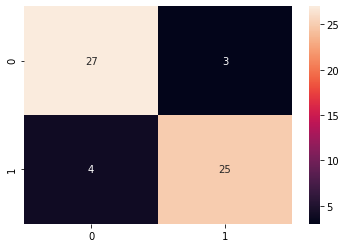

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True)


In [44]:
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.90      0.89        30
           1       0.89      0.86      0.88        29

    accuracy                           0.88        59
   macro avg       0.88      0.88      0.88        59
weighted avg       0.88      0.88      0.88        59



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


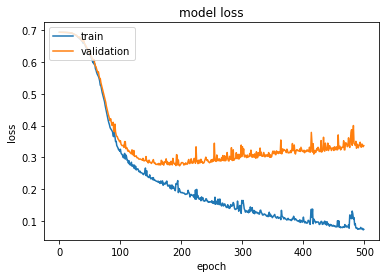

In [45]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('ANN_Accuracy.png')
plt.show()


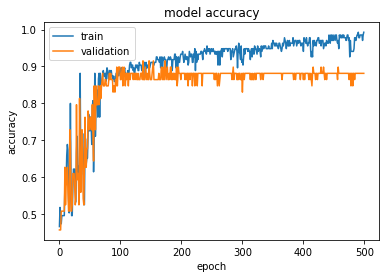

In [46]:
# "accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('ANN_Loss.png')
plt.show()

# **PCA pour la réduction de dimension ...** 





1.   visualisation de données : on projete notre dataset dans un espace 2D (n_components=2)
2.   Compression de données: reduire au maximum la taille du dataset tout en conservant 95-99% de la variance de données



In [47]:
from sklearn.decomposition import PCA

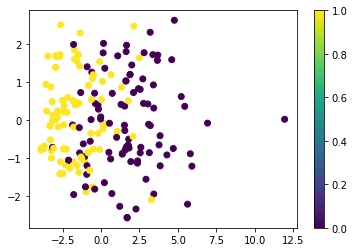

In [48]:
pca = PCA(n_components=2)
X_newd=pca.fit_transform(X)
plt.scatter(X_newd[:,0],X_newd[:,1],c=Y)
plt.colorbar()
plt.savefig('PCA.png')


Pourcentage de variance préservé de chaque composante

NB: le pourcentage de variance est faible alors on a perdu en terms de qualité de nos données.

j'ai appliqué le PCA pour la visualisation de nos données dans un espace 2D et aussi pour l'évaluation du nôtre classifier car il me donne une possibilité de faire le traçage de la zone de décision

In [49]:
pca.explained_variance_ratio_

array([0.35717092, 0.07148458])

# **Apprentissage automatique avec AdaBoostClassifier **




In [50]:

#Polynomial the Data
scaler = PolynomialFeatures(degree=2, include_bias=False)
X = scaler.fit_transform(X)
#selection feature
X_new = SelectKBest(f_classif, k=13).fit_transform(X, Y)
#split data on train and test
X_train, X_test,Y_train,Y_test = train_test_split(X_new,Y, test_size=0.3, random_state=0,shuffle=True)
StandardScaler=StandardScaler()
#feature scaling
X_train=StandardScaler.fit_transform(X_train)
X_test=StandardScaler.transform(X_test)





In [51]:
#apply Principal Component Analysis for dimensionality reduction (Nbr components =2)
pca = PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
model = AdaBoostClassifier(random_state=0)
# fit the model
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
y_eval=model.predict(X_train)


**Visualisation du matrice de confusion et le rapport de classification pour évaluer notre model dans la phase de l'apprentissage**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        68

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



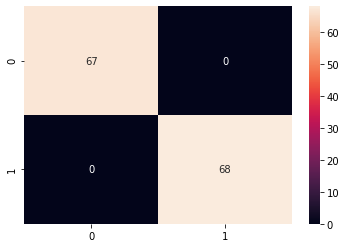

In [52]:
# Making the Confusion Matrix and Classification Report 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train, y_eval)
sns.heatmap(cm, annot=True)
print(classification_report(Y_train, y_eval))

**Visualisation Decision boundary pour le training**




*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


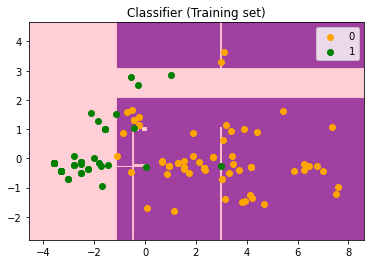

In [53]:
# Visualising the Train set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('purple', 'pink')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.legend()
plt.savefig('Decision_boundary_train.png')
plt.show()

**Visualisation du matrice de confusion et le rapport de classification pour évaluer notre model dans la phase de validation**

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.97      0.98        29

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



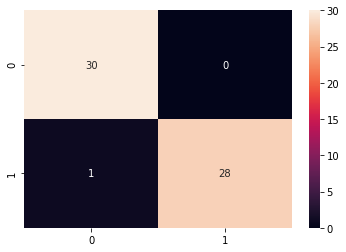

In [54]:
# Making the Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True)
print(classification_report(Y_test, y_pred))


**Visualisation Decision boundary pour le validation**


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


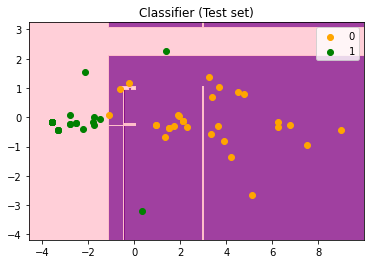

In [55]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('purple', 'pink')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.legend()
plt.savefig('Decision_boundary_test.png')

plt.show()

**ROC(receiver operating characteristic):**
est une mesure de la performance d'un classificateur binaire

NB:cette figure indique que notre  AdaBoostClassifier à un : 
 






*   F1_score égale 99% 







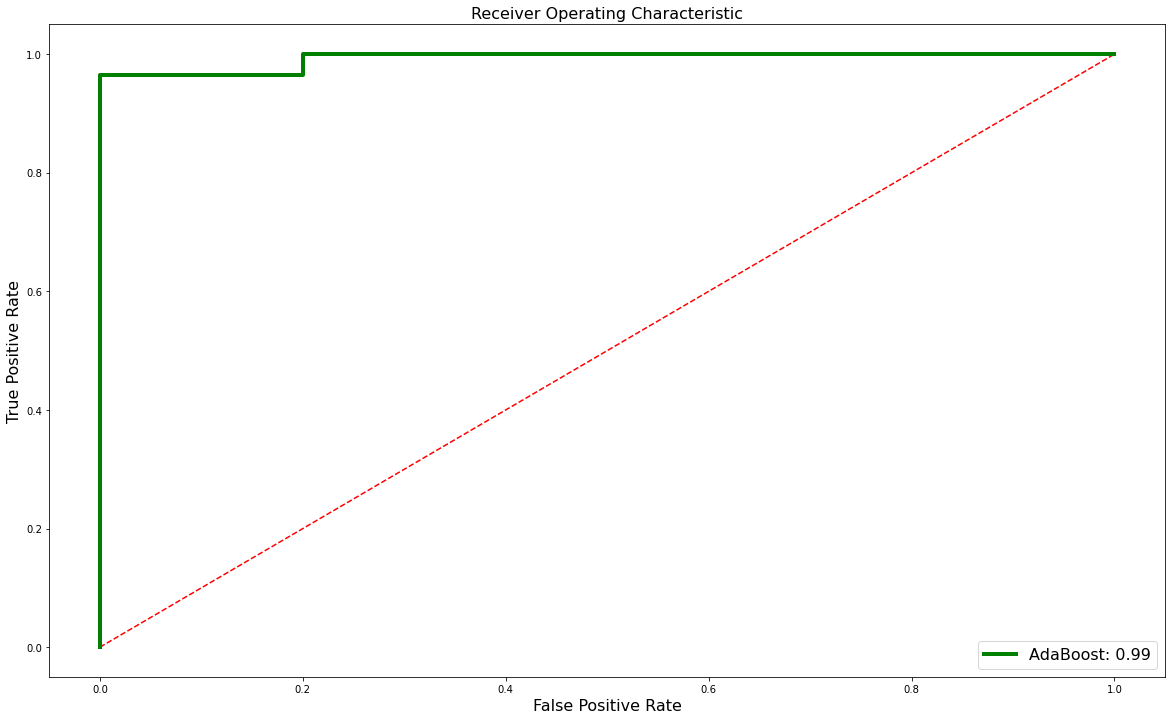

In [56]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')
model.fit(X_train,Y_train)
probs = model.predict_proba(X_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, probs)
roc_auc = auc(fpr, tpr)
label = 'AdaBoost:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)
plt.savefig('receiver_operating_characteristic.png')

**Precision Recall Curve:** C'est la courbe précision-rappel montre le compromis entre précision et rappel pour différents seuils

**NB**:cette courbe indique le seuil où notre classifier atteint le maximum de score  F1 (égale -0.1) avec un score égale 98,24%


In [57]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score


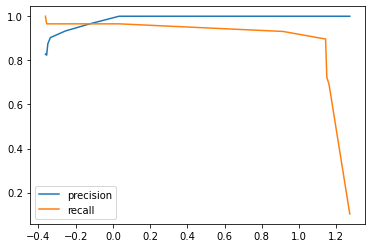

In [58]:
precision, recall, threshold = precision_recall_curve(Y_test, model.decision_function(X_test))
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()
plt.savefig('Precision_Recall_Curve.png')

In [59]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [60]:
y_pred = model_final(model, X_test, threshold=-0.1)
f1_score(Y_test, y_pred)


0.9824561403508771

In [61]:
recall_score(Y_test, y_pred)

0.9655172413793104